In [1]:
# data
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
g = torch.Generator().manual_seed(2147483647)

words = open('./data/names.txt', 'r').read().splitlines()
v = sorted(list(set(''.join(words))))
encode = { c:i+1 for i,c in enumerate(v) }
encode['.'] = 0
decode = { i:c for c,i in encode.items() }

X, Y = [], []
for w in words[:1]:
    cs = ['.'] + list(w) + ['.']
    for c1, c2 in zip(cs, cs[1:]):
        x, y = encode[c1], encode[c2]
        X.append(x)
        Y.append(y)
X, Y = torch.tensor(X), torch.tensor(Y)

anll=tensor(2.4516)
3.7693049907684326
2.8476314544677734
3.3177599906921387
3.532886028289795
4.337294578552246
3.456015110015869
4.484967231750488
4.010637283325195
3.3913605213165283
3.6365928649902344


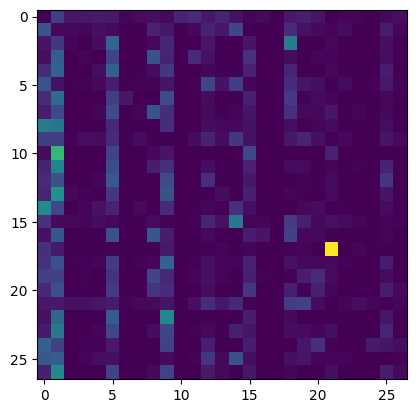

In [2]:
# model + training
# 1. freq counts
C = torch.zeros((27,27), dtype=torch.int32)
for w in words:
    cs = ['.'] + list(w) + ['.']
    for c1, c2 in zip(cs, cs[1:]):
        C[encode[c1], encode[c2]] += 1  # model: counts
smoothing = 1
P = (C.float()+smoothing) / C.float().sum(1, keepdim=True) # todo, understand broadcasting and shapes.
                                               # keepdim=False ==> normalizing cols instead of rows
plt.imshow(P)

nll, n = 0.0, 0
for w in words:
    cs = ['.'] + list(w) + ['.']
    for c1, c2 in zip(cs, cs[1:]):
        i, j = encode[c1], encode[c2]
        nll -= torch.log(P[i, j])
        n += 1
anll = nll/n
print(f'{anll=}')

# 2.  y_hat = softmax(Wx) (5,27) @ (27,27) -> (5,27)
for k in range(10):
    # -forward
    Xe = F.one_hot(X, num_classes=27).float() # .one_hot does not support d_type=torch.int32
    W = torch.randn((27,27), generator=g, requires_grad=True)
    logits = (Xe @ W) # R
    y_hat = logits.exp() / logits.exp().sum(1, keepdims=True) # softmax = R+/normalize
    loss = -y_hat[torch.arange(5), Y].log().mean() # todo: pluck out probs?
    # @, .exp(), / and .sum() are all differentiable
    print(loss.item())

    # -backward
    W.grad = None
    loss.backward()

    # -update
    W.data += -0.1 * W.grad


In [3]:
# inference
i_terminal = 0
for _ in range(20):
    i = i_terminal
    output = []
    while True:
        # y_hat = P[i]
        Xe = F.one_hot(torch.tensor([i]), num_classes=27).float()
        logits = (Xe @ W) # R
        y_hat = logits.exp() / logits.exp().sum(1, keepdims=True) # softmax = R+/normalize

        i = torch.multinomial(y_hat, num_samples=1, replacement=True, generator=g).item()
        o.append(decode[i])
        if i == i_terminal:
            break
    print(''.join(output))

akxxmiqabxajwjodacxgeod.
fjnhsld.
svagrziuahcjldkni.
ectwpuvalvzrmrfwjdnycynhxbigunfd.
ynkqalnmnhigwkv.
espnztpyahcqukbvyx.
ehqenid.
jzf.
wltjjunwjciqjgunyho.
ebunihbfdyxnyodutxdygycwmdtmippgqsd.
bfwlafrmtgywotd.
dldrzipkv.
azwjnuwidripvho.
cmvchigd.
cywbcmakanjvvqfrpgdrmtxldaxev.
nld.
nhawigbwewjobfknkldkahiphszimtbfsmtlmnhj.
asppqwywgzyxadldyyhptgrianfsqeodmgyojscldwquetinzibffjq.
esi.
wjkvywspppsoldywlwjnkbrdsfldasbfdrwfjnhctgrzofgadrvzglxpctfjeskkvyxsfd.
